# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.

La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [220]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

Generamos un grupo de puntos utilizando la funcion make_blobs:

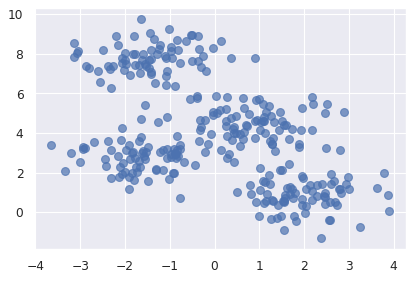

In [221]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)
 
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

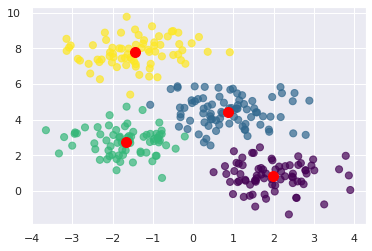

In [222]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

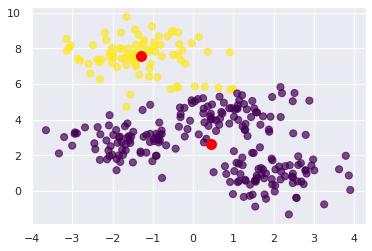

In [223]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=2, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

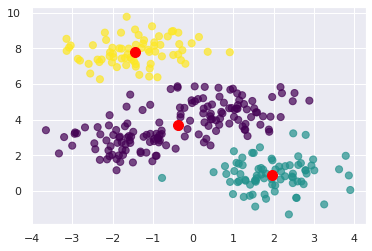

In [224]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=3, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

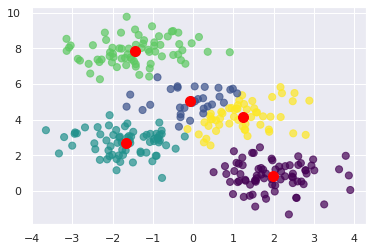

In [225]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

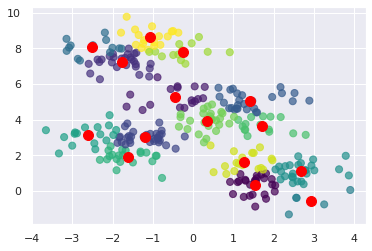

In [226]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=15, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Se puede apreciar que con todos los numeros propuestos dan un resultado extraño debido a que no se estan organizando bien, en cambio con 4 si se organizan bien los puntos del mapa con sus repectivos centroides

Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

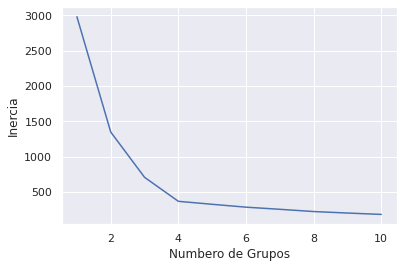

In [227]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [228]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20820979, -0.90310861, -0.91804932, -0.12904541, -0.14077872,
       -0.11760151, -0.14126267, -0.10352559, -0.10580101])

In [229]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.30510118, -0.01494072,  0.78900391, -0.01173331,  0.02317721,
       -0.02366116,  0.03773707, -0.00227542])

In [230]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de: 
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [231]:
import pandas as pd

archivo_clientes = '/content/clientes.txt'
clientes = pd.read_csv(archivo_clientes, index_col='ID:Cliente')
clientes.head()

,Genero,Edad,Salario,Clasificacion_gasto
ID:Cliente,,,,
1,Hombre,19,15,39
2,Hombre,21,15,81
3,Mujer,20,16,6
4,Mujer,23,16,77
5,Mujer,31,17,40


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

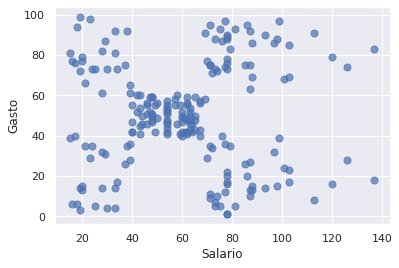

In [232]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

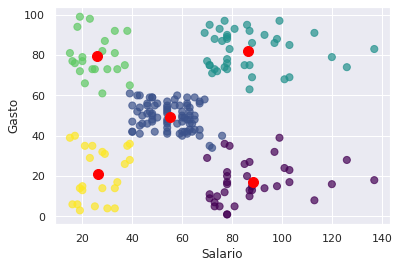

In [233]:
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

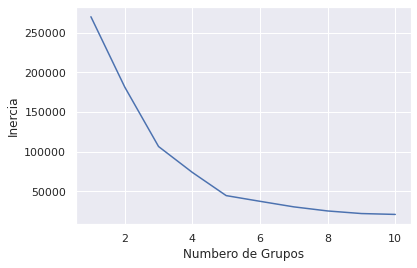

In [234]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

In [235]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-0.48861892, -0.70537255, -0.44338596, -0.65764565, -0.19273912,
       -0.23153626, -0.20577044, -0.14959482, -0.05272599])

In [236]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([-0.21675363,  0.26198659, -0.21425969,  0.46490653, -0.03879714,
        0.02576582,  0.05617562,  0.09686883])

In [237]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

5

Como se puede apreciar en la grafica el codo está en el numero 5

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [238]:
objetivo = k_medias.predict(np.array([[90, 10]]))[0]
objetivo

3

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [239]:
# Grupo de poco gastadores con altos ingresos:
clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values)
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
129,Hombre,59,71,11,3
131,Hombre,47,71,9,3
135,Hombre,20,73,5,3
137,Mujer,44,73,7,3
139,Hombre,19,74,10,3
141,Mujer,57,75,5,3
145,Hombre,25,77,12,3
149,Mujer,34,78,22,3
151,Hombre,43,78,17,3


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [240]:
from sklearn.preprocessing import LabelEncoder
 
df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero'])
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
ID:Cliente,,,,,
1,0,19,15,39,1
2,0,21,15,81,4
3,1,20,16,6,7
4,1,23,16,77,4
5,1,31,17,40,1


Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [241]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values
k_medias = KMeans(n_clusters=5, random_state=0)
k_medias.fit(puntos)
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

ID:Cliente
1      0
2      4
3      0
4      4
5      0
      ..
196    1
197    3
198    1
199    3
200    1
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

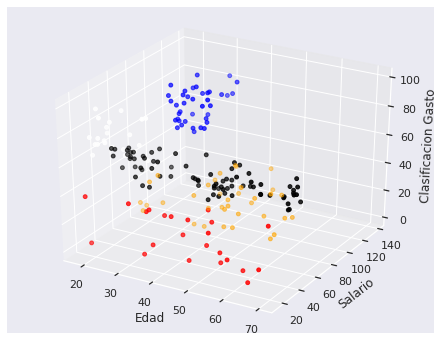

In [242]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Edad, df.Salario, df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [243]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])
 
for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()
 
    gdf = df[df['Grupo'] == i]
     
    resultados.loc[i] = ([i, edad, ingresos, gasto])
 
resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,45.217391,26.304348,20.913043
1,1.0,32.692308,86.538462,82.128205
2,2.0,43.088608,55.291139,49.569620
3,3.0,40.666667,87.750000,17.583333
4,4.0,25.521739,26.304348,78.565217


In [244]:
k_medias.predict(np.array([[20, 20, 20]]))[0]

0

# Actividad:

Utilizando el archivo de datos sobre propiedas en EEUU, ¿Que tipo de grupos puedes generar mediante aprendizaje no supervisado?¿Que aplicaciones o utilidades podriamos extraer de estos datos?

Los datos son los siguientes: 

'Avg. Area Income': Ingresos medios de los residentes en la localizacion.
'Avg. Area House Age': Antiguedad media de las casas en la ciudad.
'Avg. Area Number of Rooms': Media de habitaciones por casa en la zona.
'Avg. Area Number of Bedrooms': Media de dormitorios por casa en la zona.
'Area Population': Poblacion de la zona en la que se localiza la casa.
'Price': Precio de la casa.
'Address': Direccion postal de la casa.

In [245]:
import pandas as pd

archivo_housing = '/content/USA_Housing.csv'
housing = pd.read_csv(archivo_housing, index_col='Address')
housing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Address,,,,,,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


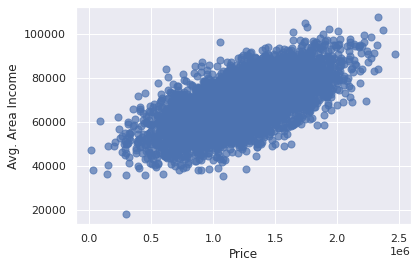

In [246]:
puntos = housing[ ['Price','Avg. Area Income'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Avg. Area Income');

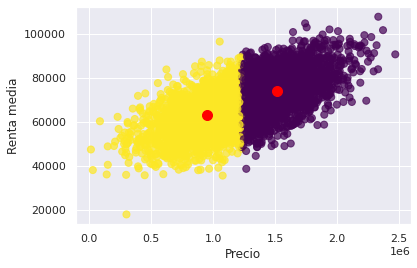

In [247]:
k_medias = KMeans(n_clusters=2, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Precio')
plt.ylabel('Renta media')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

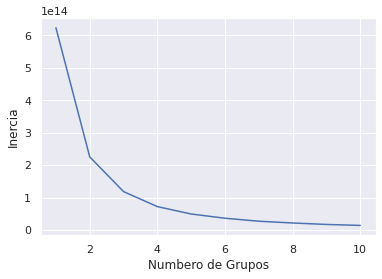

In [248]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

###En este caso parece que se produce un cambio en el 2 pero tambien en el 3 aunque el cambio parece ser mayor en el 2 , vamos a comprobarlo numericamente

In [249]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.76845402, -0.90393925, -0.64337738, -0.46319417, -0.36141718,
       -0.33981584, -0.25406602, -0.2661284 , -0.21319779])

In [250]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.86451477,  0.26056187,  0.18018321,  0.101777  ,  0.02160134,
        0.08574981, -0.01206237,  0.0529306 ])

In [251]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

2

###En este caso el mejor codo se situa en el 2 por lo que lo mejor seria dividir en 2 grupos

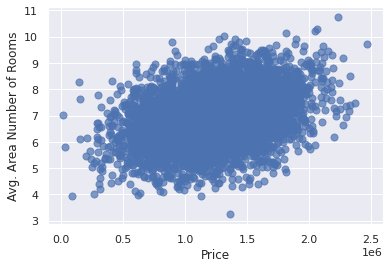

In [252]:
puntos = housing[ ['Price','Avg. Area Number of Rooms'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Avg. Area Number of Rooms');

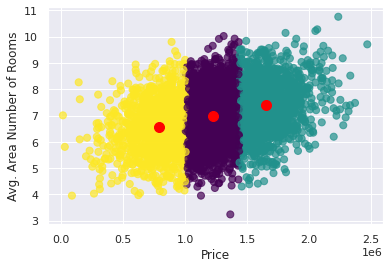

In [253]:
k_medias = KMeans(n_clusters=3, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Avg. Area Number of Rooms')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

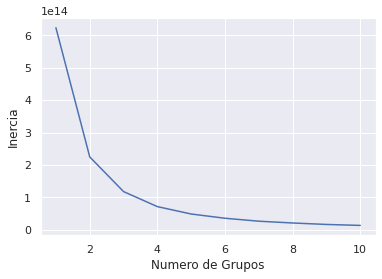

In [254]:
inercias = []
 
for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0)
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)
 
plt.plot(range(1, 11), inercias)
plt.xlabel('Numero de Grupos')
plt.ylabel('Inercia');

In [255]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.77113404, -0.90647454, -0.64635731, -0.46642812, -0.36639748,
       -0.34171898, -0.25891189, -0.27082224, -0.21866936])

In [256]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.8646595 ,  0.26011723,  0.17992919,  0.10003064,  0.0246785 ,
        0.08280708, -0.01191035,  0.05215288])

In [257]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

2

##He probado con tres cluster pero de nuevo la mejor division es en dos grupos

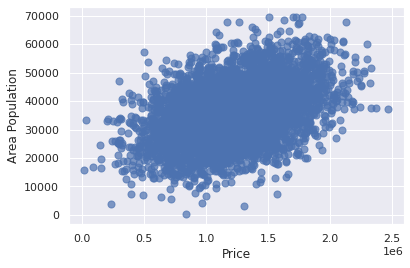

In [258]:
puntos = housing[ ['Price','Area Population'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Area Population');

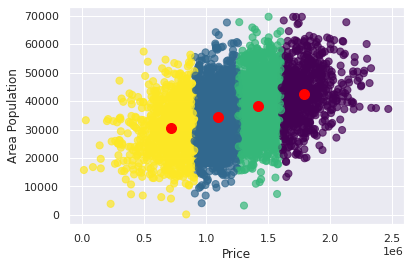

In [259]:
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Area Population')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

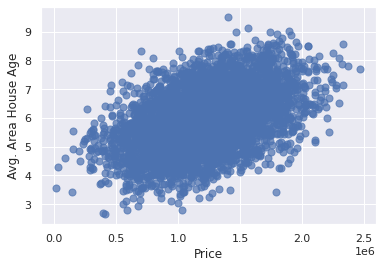

In [260]:
puntos = housing[ ['Price','Avg. Area House Age'] ].values
x = puntos[:, 0]
y = puntos[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Avg. Area House Age');

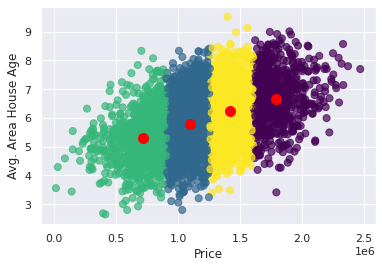

In [261]:
k_medias = KMeans(n_clusters=4, random_state=0)
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)
 
plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Avg. Area House Age')
 
centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

##Despues de probar con distintos campos de datos y distintos numeros de cluster , basandome en el metodo del codo voy a continuar con dos grupos

In [262]:
from sklearn.preprocessing import LabelEncoder
 
df = housing.copy()
codificador = LabelEncoder()

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Address,,,,,,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [263]:
housing.rename(columns={'Avg. Area House Age':'Antiguedad',
                        'Avg. Area Number of Bedrooms':'Dormitorios'},
               inplace=True)
housing.columns

Index(['Avg. Area Income', 'Antiguedad', 'Avg. Area Number of Rooms',
       'Dormitorios', 'Area Population', 'Price'],
      dtype='object')

In [264]:
puntos = housing[['Price', 'Antiguedad', 'Dormitorios']].values
k_medias = KMeans(n_clusters=2, random_state=0)
k_medias.fit(puntos)
housing['Grupo'] = k_medias.predict(puntos)
housing.Grupo

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101       1
188 Johnson Views Suite 079\nLake Kathleen, CA 48958       0
9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489        1
USS Barnett\nFPO AP 44820                                  0
USNS Raymond\nFPO AE 09386                                 1
                                                          ..
USNS Williams\nFPO AP 30153-7653                           1
PSC 9258, Box 8489\nAPO AA 42991-3352                      0
4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165     1
USS Wallace\nFPO AE 73316                                  1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595    0
Name: Grupo, Length: 5000, dtype: int32

In [265]:
for column in housing:
     print(column)

Avg. Area Income
Antiguedad
Avg. Area Number of Rooms
Dormitorios
Area Population
Price
Grupo


In [266]:
housing

,Avg. Area Income,Antiguedad,Avg. Area Number of Rooms,Dormitorios,Area Population,Price,Grupo
Address,,,,,,,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,0
USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,1
...,...,...,...,...,...,...,...
USNS Williams\nFPO AP 30153-7653,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,1
"PSC 9258, Box 8489\nAPO AA 42991-3352",78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,0
"4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165",63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1


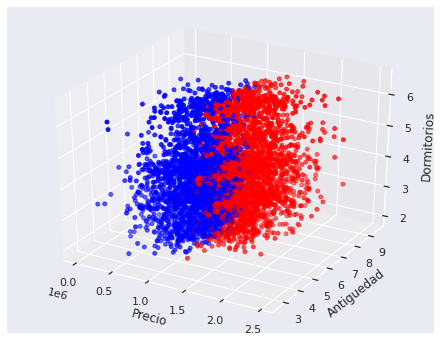

In [267]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['red', 'blue']

housing['color'] = housing.Grupo.map({0:colors[0], 1:colors[1]
        })
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(housing.Price, housing.Antiguedad, housing.Dormitorios, c=housing.color, s=15)
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad')
ax.set_zlabel('Dormitorios')
plt.show()

In [268]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Precio',
                                     'Antiguedad',
                                     'Dormitorios'])
 
for i in range(len(k_medias.cluster_centers_)):
    Precio = housing[housing['Grupo'] == i]['Price'].mean()
    Antiguedad = housing[housing['Grupo'] == i]['Antiguedad'].mean()
    Dormitorios = housing[housing['Grupo'] == i]['Dormitorios'].mean()
 
    gdf = housing[housing['Grupo'] == i]
     
    resultados.loc[i] = ([i, Precio, Antiguedad, Dormitorios])
 
resultados.tail()

,Grupo,Precio,Antiguedad,Dormitorios
0,0.0,1.513109e+06,6.338961,4.141087
1,1.0,9.485522e+05,5.612285,3.820161


In [269]:
objetivo= k_medias.predict(np.array([[1.513109e+06, 5, 4]]))[0]
objetivo

0

##Listado de propiedades de precio elevado .Podria servir para seleccionar un conjunto de propiedades que ofrecer a clientes de alto nivel adquisitivo

In [270]:
housing['Grupo'] = k_medias.predict(housing[['Price','Antiguedad','Dormitorios']])
housing[housing['Grupo']==objetivo]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Avg. Area Income,Antiguedad,Avg. Area Number of Rooms,Dormitorios,Area Population,Price,Grupo,color
Address,,,,,,,,
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0,red
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,0,red
"4759 Daniel Shoals Suite 442\nNguyenburgh, CO 20247",64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,0,red
"972 Joyce Viaduct\nLake William, TN 17778-6483",78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,0,red
Unit 9446 Box 0958\nDPO AE 97025,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,0,red
...,...,...,...,...,...,...,...,...
"2871 John Lodge\nAmychester, GU 61734-5597",74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,0,red
Unit 2096 Box 9559\nDPO AE 80983-8797,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,0,red
"5259 David Causeway Apt. 975\nSouth Alexstad, IL 42719-2498",69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,0,red


In [271]:
housing.rename(columns={'Avg. Area Income':'Renta_zona'
                        },
               inplace=True)
housing.columns

Index(['Renta_zona', 'Antiguedad', 'Avg. Area Number of Rooms', 'Dormitorios',
       'Area Population', 'Price', 'Grupo', 'color'],
      dtype='object')

In [272]:
puntos = housing[['Price', 'Renta_zona', 'Dormitorios']].values
k_medias = KMeans(n_clusters=2, random_state=0)
k_medias.fit(puntos)
housing['Grupo'] = k_medias.predict(puntos)
housing.Grupo

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101       1
188 Johnson Views Suite 079\nLake Kathleen, CA 48958       0
9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489        1
USS Barnett\nFPO AP 44820                                  0
USNS Raymond\nFPO AE 09386                                 1
                                                          ..
USNS Williams\nFPO AP 30153-7653                           1
PSC 9258, Box 8489\nAPO AA 42991-3352                      0
4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165     1
USS Wallace\nFPO AE 73316                                  1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595    0
Name: Grupo, Length: 5000, dtype: int32

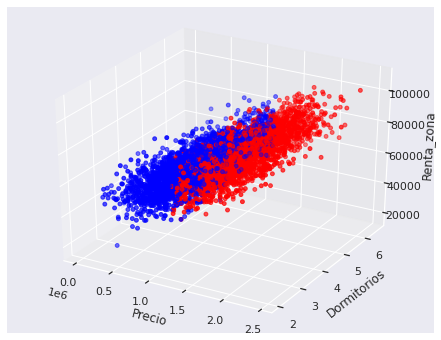

In [273]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['red', 'blue']

housing['color'] = housing.Grupo.map({0:colors[0], 1:colors[1]
        })
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(housing.Price, housing.Dormitorios, housing.Renta_zona, c=housing.color, s=15)
ax.set_xlabel('Precio')
ax.set_ylabel('Dormitorios')
ax.set_zlabel('Renta_zona')
plt.show()

In [274]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Precio',
                                     'Dormitorios',
                                     'Renta_zona'])
 
for i in range(len(k_medias.cluster_centers_)):
   
    
    Precio = housing[housing['Grupo'] == i]['Price'].mean()
    Dormitorios = housing[housing['Grupo'] == i]['Dormitorios'].mean()
    Renta_zona = housing[housing['Grupo'] == i]['Renta_zona'].mean()
    gdf = housing[housing['Grupo'] == i]
     
    resultados.loc[i] = ([i, Precio, Dormitorios, Renta_zona])
 
resultados.head()

,Grupo,Precio,Dormitorios,Renta_zona
0,0.0,1.513222e+06,4.141343,73946.751212
1,1.0,9.486654e+05,3.820032,63176.385292


##Una vez seleccionado el nivel economico podriamos utilizar los datos anteriores para ofrecer pisos de distinto precio segun el numero de dormitorios

In [284]:
objetivo= k_medias.predict(np.array([[1.513222e+06		, 6, 73946.751212]]))[0]
objetivo

0

In [285]:
#grupo de propiedades en zonas con alto nivel adquisitivo
housing['Grupo'] = k_medias.predict(housing[['Price','Dormitorios','Renta_zona']])
housing[housing['Grupo']==objetivo]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Renta_zona,Antiguedad,Avg. Area Number of Rooms,Dormitorios,Area Population,Price,Grupo,color
Address,,,,,,,,
"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0,red
USS Barnett\nFPO AP 44820,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,0,red
"4759 Daniel Shoals Suite 442\nNguyenburgh, CO 20247",64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,0,red
"972 Joyce Viaduct\nLake William, TN 17778-6483",78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,0,red
Unit 9446 Box 0958\nDPO AE 97025,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,0,red
...,...,...,...,...,...,...,...,...
"2871 John Lodge\nAmychester, GU 61734-5597",74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,0,red
Unit 2096 Box 9559\nDPO AE 80983-8797,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,0,red
"5259 David Causeway Apt. 975\nSouth Alexstad, IL 42719-2498",69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,0,red


In [286]:
objetivo= k_medias.predict(np.array([[1.513222e+05		, 6, 73946.751212]]))[0]
objetivo

1

In [288]:
#grupo de propiedades en zonas con menor nivel adquisitivo
housing['Grupo'] = k_medias.predict(housing[['Price','Dormitorios','Renta_zona']])
housing[housing['Grupo']==objetivo]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Renta_zona,Antiguedad,Avg. Area Number of Rooms,Dormitorios,Area Population,Price,Grupo,color
Address,,,,,,,,
"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1,blue
"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1,blue
USNS Raymond\nFPO AE 09386,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,1,blue
"06039 Jennifer Islands Apt. 443\nTracyport, KS 16077",80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,1,blue
USS Gilbert\nFPO AA 20957,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,1,blue
...,...,...,...,...,...,...,...,...
"86727 Kelly Plaza\nLake Veronica, IL 04474",52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,1,blue
"5224 Lamb Passage\nNancystad, GA 16579",73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,1,blue
USNS Williams\nFPO AP 30153-7653,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,1,blue
